# Tweets for #seacabó and #seacabo in 2023

In [46]:
import pandas as pd

# Assuming your CSV has a column named 'tweet'
df = pd.read_csv('seacabo_2023.csv')
tweets = df['text'].tolist()
len(df)

20291

In [43]:
df.columns

Index(['Unnamed: 0', 'tweet_avatar', 'tweet_id', 'url', 'query', 'text',
       'username', 'fullname', 'timestamp', 'language', 'in_reply_to',
       'replies', 'retweets', 'quotes', 'images', 'likes', 'banner_image',
       'total_tweets', 'num_following', 'num_followers', 'total_likes',
       'tweet_links', 'tweet_hashtags', 'tweet_mentions'],
      dtype='object')

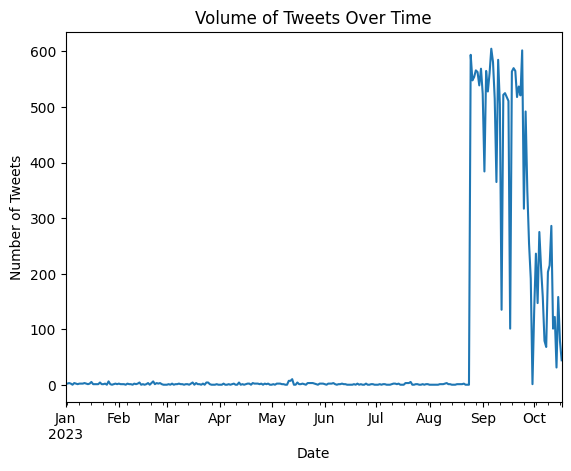

In [29]:
# Assuming you have a 'timestamp' column in df and it's in the format 'YYYY-MM-DD'
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Plotting tweet volume
df.resample('D').size().plot()
plt.title('Volume of Tweets Over Time')
plt.ylabel('Number of Tweets')
plt.xlabel('Date')
plt.show()

In [51]:
# filter df to only tweets from Aug
df_filtered = df
cutoff = "2023-08-25" # asamblea

# Ensure the 'date' column is in datetime format

df_filtered = df_filtered[df_filtered["timestamp"] >= cutoff]

len(df_filtered)

19991

C:\Users\jorge\AppData\Local\Temp\ipykernel_91960\2569021180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['timestamp'] = pd.to_datetime(df_filtered['timestamp'])


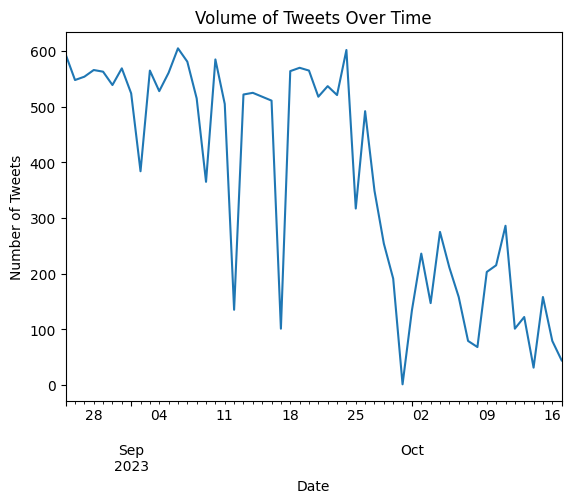

In [52]:
# Assuming you have a 'timestamp' column in df and it's in the format 'YYYY-MM-DD'
df_filtered['timestamp'] = pd.to_datetime(df_filtered['timestamp'])
df_filtered.set_index('timestamp', inplace=True)

# Plotting tweet volume
df_filtered.resample('D').size().plot()
plt.title('Volume of Tweets Over Time')
plt.ylabel('Number of Tweets')
plt.xlabel('Date')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


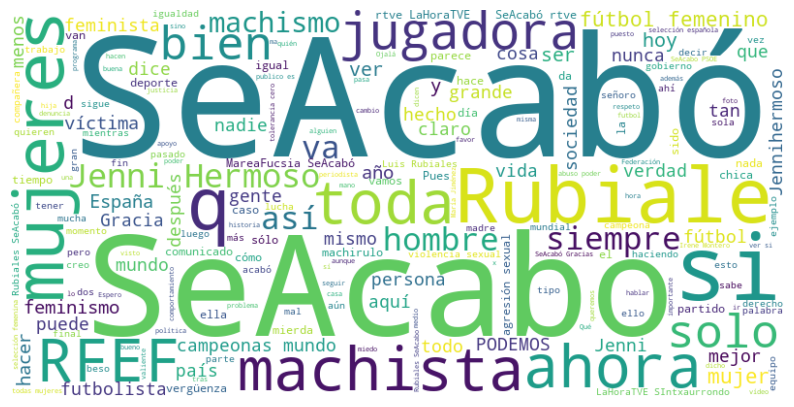

In [14]:
#!pip install wordcloud
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud

stop_words = set(stopwords.words('spanish'))
words = [word for tweet in tweets for word in tweet.split() if word.lower() not in stop_words]
all_words = ' '.join(words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


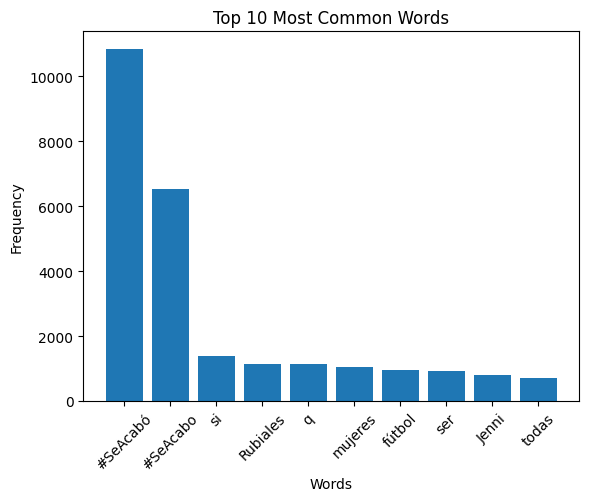

In [13]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('spanish'))
words = [word for tweet in tweets for word in tweet.split() if word.lower() not in stop_words]
count = Counter(words)
most_common = count.most_common(10)

words, frequencies = zip(*most_common)
plt.bar(words, frequencies)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

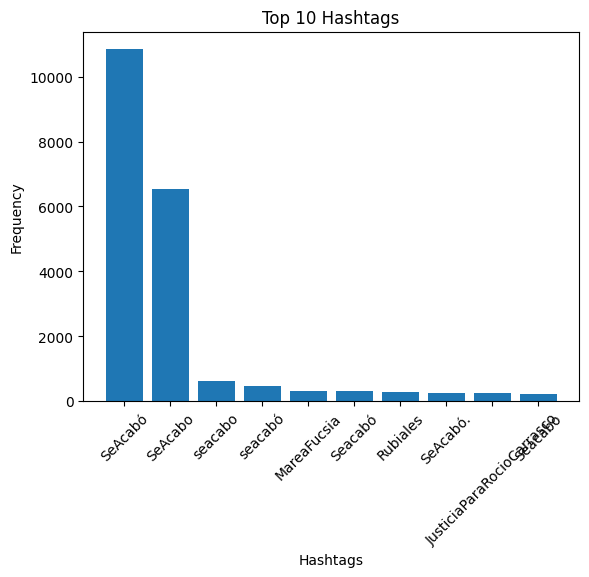

In [15]:
hashtags = [word[1:] for tweet in tweets for word in tweet.split() if word.startswith('#')]
hashtag_counts = Counter(hashtags).most_common(10)
tags, counts = zip(*hashtag_counts)
plt.bar(tags, counts)
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

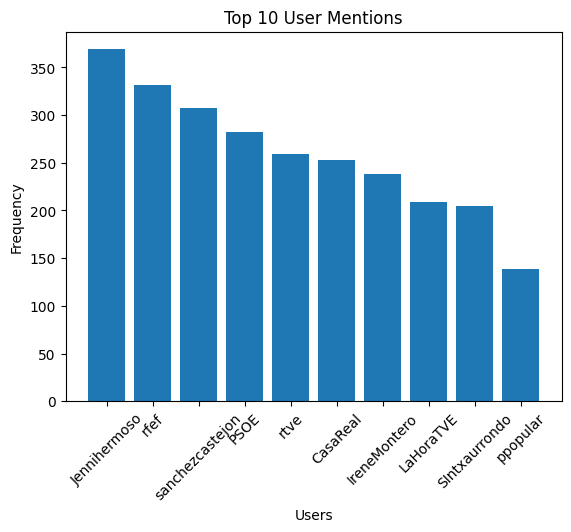

In [16]:
mentions = [word[1:] for tweet in tweets for word in tweet.split() if word.startswith('@')]
mention_counts = Counter(mentions).most_common(10)
users, counts = zip(*mention_counts)
plt.bar(users, counts)
plt.title('Top 10 User Mentions')
plt.xlabel('Users')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

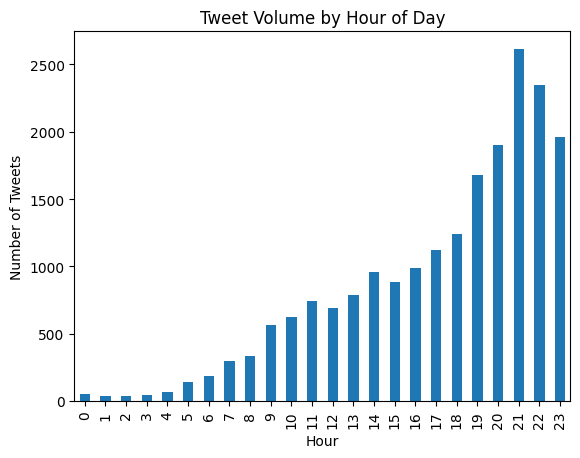

In [17]:
# Assuming you have already converted 'timestamp' to datetime format in df
df['hour'] = df.index.hour
hourly_counts = df.groupby('hour').size()
hourly_counts.plot(kind='bar')
plt.title('Tweet Volume by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.show()

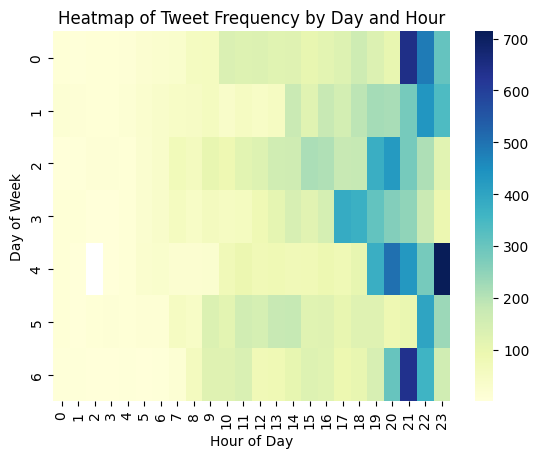

In [20]:
#!pip install seaborn
import seaborn as sns

# Assuming you've added 'hour' and 'dayofweek' to df
df['dayofweek'] = df.index.dayofweek
pivot_table = df.pivot_table(index='dayofweek', columns='hour', values='text', aggfunc='count')

sns.heatmap(pivot_table, cmap="YlGnBu")
plt.title('Heatmap of Tweet Frequency by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()